# Servo Prediction using Linear Regression

# Objective
* The objective of the servo prediction using linear regression is to build a model that can predict the class of a servo mechanism based on its motor, screw, Pgain, and Vgain values. The class of a servo mechanism is a categorical variable that can take on one of five values: 1, 2, 3, 4, or 5.

* The linear regression model will be trained on a dataset of servo mechanisms with known classes. Once the model is trained, it can be used to predict the class of a new servo mechanism. This can be useful for tasks such as quality control, fault diagnosis, and performance optimization.

# Data Source
* Servo Mechanism dataset is used for Servo Prediction Using Linear Regression
* The servo mechanism dataset is a collection of data points that describe the characteristics of a servo mechanism. The data points include the motor type, screw type, Pgain, Vgain, and rise time. The rise time is the time it takes for the servo mechanism to reach its target position after a step change in the input signal.

# Get Understanding about Data Set 

# Import Library

In [3]:
import numpy as np
import pandas as pd

# Import CSV as DataFrame

In [6]:
df = pd.read_csv('./Servo Mechanism.csv')

In [7]:
#df = pd.read_csv(r'/content/Servo Mechanism.csv')

# Get the first five Rows of Dataframe

In [8]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# Get Information of Dataframe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


# Describe Data

In [12]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


# Get Column Names

In [13]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

# Get the Shape of DataFrame

In [14]:
df.shape

(167, 5)

# Get Categories and counts of Categorical Variables

In [15]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [16]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

   # Get Encoding of Categorical Features

In [17]:
df.replace({'Motor':{'A':0,'B':1, 'C':2 , 'D':3 ,'E':4}},inplace=True)

In [18]:
df.replace({'Screw':{'A':0,'B':1, 'C':2 , 'D':3 ,'E':4}},inplace=True)

# Define y (Dependent Variable) and X(Independent Variable)

In [19]:
y = df['Class']

In [20]:
y.shape

(167,)

In [21]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [22]:
X = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [23]:
X.shape

(167, 4)

In [24]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


# Get Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X,y, train_size = 0.7 , random_state = 2529)

In [27]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((116, 4), (51, 4), (116,), (51,))

# Get Train Model

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

# Get Model Prediction

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred.shape

(51,)

In [33]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

# Get Model Evaluation

In [34]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error , mean_squared_error , r2_score

In [35]:
mean_absolute_error(y_test,y_pred)

7.190539677251234

In [36]:
mean_absolute_percentage_error(y_test,y_pred)

0.826820463817464

In [37]:
mean_squared_error(y_test,y_pred)

66.03589175595566

In [38]:
r2_score(y_test,y_pred)

0.6807245170563927

# Get Visualization of Actual and Predicted Results

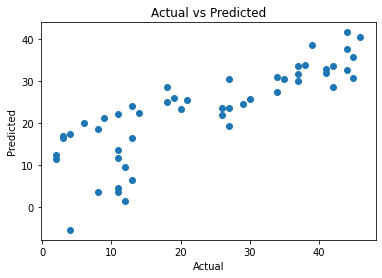

In [40]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# Get Future Predictions

In [41]:
X_new = df.sample(1)

In [42]:
X_new

,Motor,Screw,Pgain,Vgain,Class
81,0,2,6,5,11


In [43]:
X_new.shape

(1, 5)

In [44]:
X_new = X_new.drop('Class', axis=1)

In [45]:
X_new

,Motor,Screw,Pgain,Vgain
81,0,2,6,5


In [46]:
X_new.shape

(1, 4)

In [47]:
y_new_pred = model.predict(X_new)

In [48]:
y_new_pred

array([8.68747144])